Gerekli kütüphaneleri içeri aktarıyoruz.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf 
import numpy as np

Endeks verisini indirip hareketli ortalamaları hesaplıyoruz.

In [ ]:
data = yf.download("^GSPC", "2010-01-01", "2025-01-01")




fiyat = data[("Close", "^GSPC")]
data["SMA50"] = fiyat.rolling(50).mean()
data["SMA200"] = fiyat.rolling(200).mean()
data["SMA50"]
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,SMA50,SMA200
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,NaN,NaN
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,NaN,NaN
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,NaN,NaN
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,NaN,NaN
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,NaN,NaN
...,...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,5933.808203,5535.671353
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,5938.254805,5539.982952


Hareketli ortalamalarla birlikte fiyat grafiğini çizdiriyoruz.

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,NaN,NaN
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,NaN,NaN
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,NaN,NaN
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,NaN,NaN
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,NaN,NaN
...,...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,5933.808203,5535.671353
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,5938.254805,5539.982952


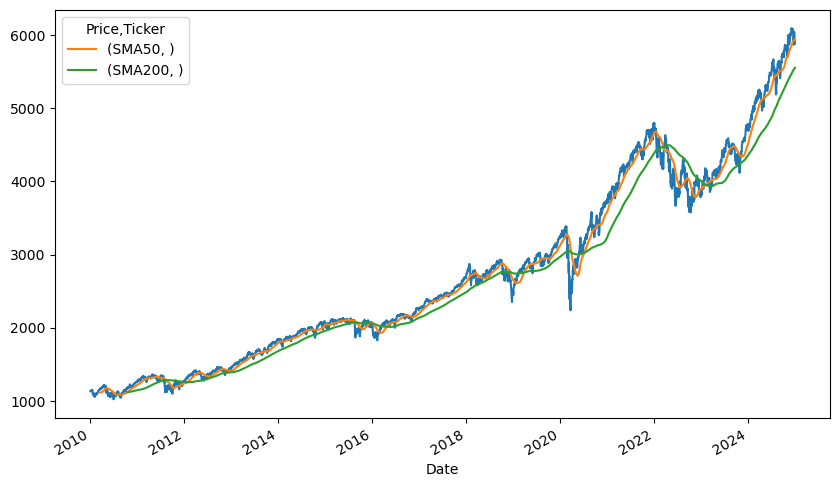

In [108]:
fiyat.plot(figsize=(10, 6))
data[["SMA50", "SMA200"]].plot(ax=plt.gca(), label=["SMA50", "SMA200"])
data

Basit bir alım-satım döngüsü kurgulayıp sonucu yazdırıyoruz.

In [180]:
bakiye = 100000
s50 = data["SMA50"]
s200 = data["SMA200"] 
pozisyon = 0
for gün in range(1, len(fiyat)):
    
    if s50.iloc[gün] != 0 and s200.iloc[gün] != 0:
        if s50.iloc[gün] > s200.iloc[gün] and s50.iloc[gün-1] <= s200.iloc[gün-1]:
            if pozisyon == 0:
                data.loc[data.index[gün], "İşlem"] = "Alış"
                adet = bakiye / fiyat.iloc[gün]
                pozisyon = adet
        elif s50.iloc[gün] < s200.iloc[gün] and s50.iloc[gün-1] >= s200.iloc[gün-1]:
            if pozisyon > 0:
                data.loc[data.index[gün], "İşlem"] = "Satış"
                bakiye = pozisyon * fiyat.iloc[gün] 
                pozisyon = 0
            
        else:
            continue
        print(bakiye)


print(f"Starting with $100.000, the portfolio is worth ${bakiye.round()} after running the strategy.\nGiving us a %119 return in 15 years.")

100000
99639.0863154189
99639.0863154189
150996.39895506622
150996.39895506622
143713.84899925155
143713.84899925155
181249.10343978592
181249.10343978592
166043.39076904944
166043.39076904944
219830.68194256534
219830.68194256534
Starting with $100.000, the portfolio is worth $219831.0 after running the strategy.
Giving us a %119 return in 15 years.


Alım ve satım noktalarıyla birlikte son grafiği çizdiriyoruz.

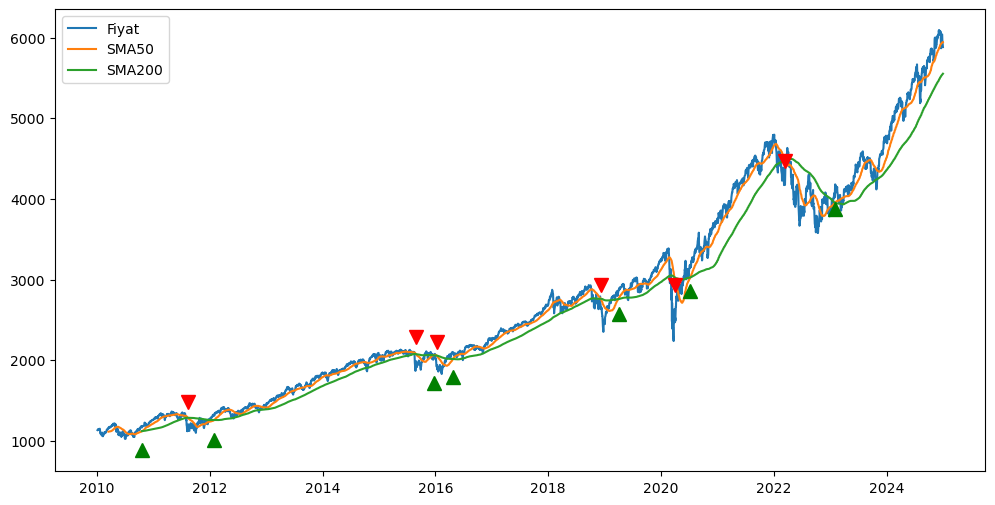

In [162]:
fig, ax = plt.subplots(sharex =True, figsize=(12, 6))
ax.plot(fiyat, label = "Fiyat")
ax.plot(s50, label = "SMA50")
ax.plot(s200, label = "SMA200")
ax.legend()


alislar = data[data["İşlem"] == "Alış"].index
satislar = data[data["İşlem"] == "Satış"].index
alislar
ax.plot(alislar, fiyat.loc[alislar]-300, '^', color='green', label="Alış", markersize=10)
ax.plot(satislar, fiyat.loc[satislar]+300, 'v', color='red', label="Satış", markersize=10)




Price,Close,High,Low,Open,Volume,SMA50,SMA200,İşlem
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,
Date,,,,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,NaN,NaN,NaN
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,NaN,NaN,NaN
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,NaN,NaN,NaN
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,NaN,NaN,NaN
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,5933.808203,5535.671353,NaN
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,5938.254805,5539.982952,NaN
